In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
# Load Datasets
iris = datasets.load_iris()
data = iris.data
target = iris.target

In [2]:
# PCA
mean = np.mean(data, axis=0)
XC = data - mean
cov = XC.T.dot(XC)
eigval, eigvec = np.linalg.eig(cov)
XR = XC.dot(eigvec[:, :2])

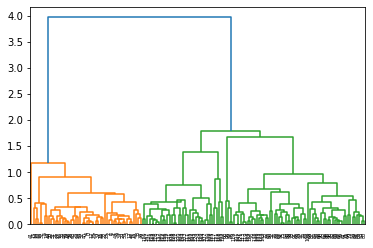

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Clustering
matrix = linkage(XR, method='centroid', metric='euclidean')
ddm = dendrogram(matrix)
plt.show()

In [5]:
from scipy.cluster.hierarchy import fcluster
kindnum = 3
pred = fcluster(matrix, kindnum, criterion='maxclust')
print(np.unique(pred, return_counts=True))

(array([1, 2, 3], dtype=int32), array([50, 37, 63]))


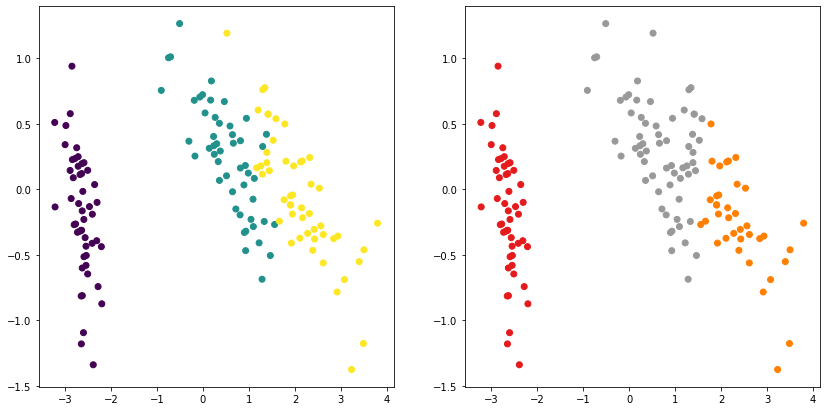

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14,7))
axes[0].scatter(XR[:,0], XR[:,1], c=iris.target)
axes[1].scatter(XR[:,0], XR[:,1], c=pred, cmap=plt.cm.Set1)
plt.show()